In [13]:
!pip install -r requirements.txt

### 1. Import dependencies

In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [19]:
print(os.getcwd())

d:\ML\ZuuCrew\Day1\Project1\Week 01


In [20]:
df = pd.read_csv('data/processed/CEHHbInToW_MissingValuesHandled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [21]:
print(f"No of Rows : {len(df)}")

No of Rows : 10000


### 3. Outlier detection techniques

#### 3.1 distribution plots

In [22]:
categorical_columns = [
                      'Geography',
                      'Gender', 'Hashcard',
                      'IsActiveMember','NumOfProducts'
                      ]

numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]


<function matplotlib.pyplot.show(close=None, block=None)>

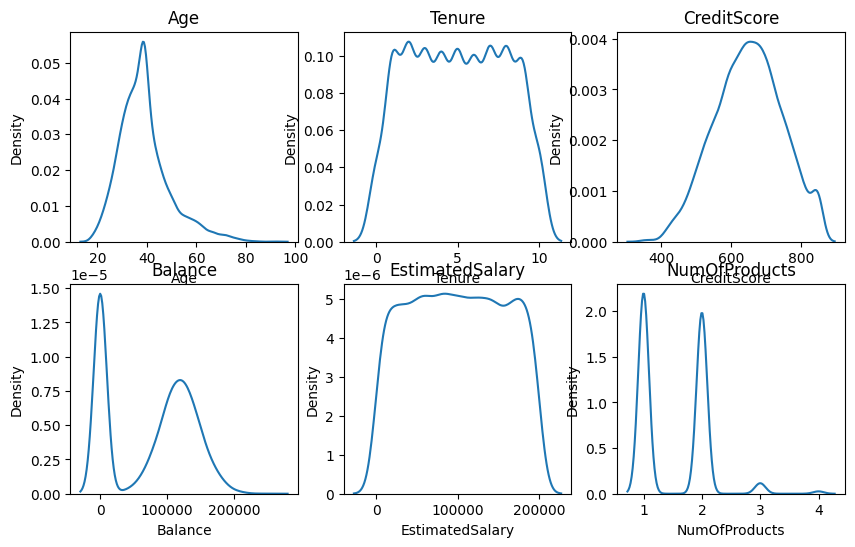

In [23]:
fig, axes = plt.subplots(2, 3, figsize = (10, 6))
axes =axes.flatten()

for idx, col in enumerate(numerical_columns):
  sns.kdeplot(
            data =df[col],
            ax= axes [idx]
            )
  axes [idx].set_title(col)
  axes [idx].set_label('')

plt.show
